#Artificial Neural Network
- Course: Machine Learning and Deep Learning
- Rajiv Gandhi University of Knowledge Technologies

In [56]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
import matplotlib.pyplot as plt

#ANN for regression

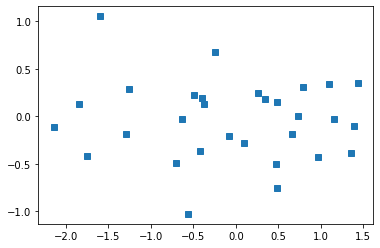

In [2]:
# create data

N = 30
m = 0
x = torch.randn(N, 1) #N rows and 1 column
y = m * x + torch.randn(N,1)/2

# and plot
plt.plot(x,y,'s')
plt.show()

In [ ]:
#Input and output shape
print(x.shape, y.shape)

torch.Size([30, 1]) torch.Size([30, 1])


In [ ]:
# build model
ANNreg = nn.Sequential(
    nn.Linear(1,1),  # input layer - preactivation
    nn.Sigmoid(),    # input layer - activation 
    nn.Linear(1,1),  # hidden layer - preactivation
    nn.Sigmoid(),    # hidden layer - activation  
    nn.Linear(1,1),   # output layer - preactivation
    nn.Linear(1,1)   # output layer - activation
    )

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=1, out_features=1, bias=True)
  (5): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
summary(ANNreg, (30,1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 30, 1]               2
           Sigmoid-2                [-1, 30, 1]               0
            Linear-3                [-1, 30, 1]               2
           Sigmoid-4                [-1, 30, 1]               0
            Linear-5                [-1, 30, 1]               2
            Linear-6                [-1, 30, 1]               2
Total params: 8
Trainable params: 8
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [ ]:
# learning rate
learningRate = .05

# loss function
lossfun = nn.MSELoss()

# optimizer (the flavor of gradient descent to implement)
optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

In [ ]:
# train the model
numepochs = 500
losses = torch.zeros(numepochs)


## Train the model!
for epochi in range(numepochs):

  # forward pass
  yHat = ANNreg(x)

  # compute loss
  loss = lossfun(yHat,y)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad() #Sets the gradients of all optimized torch.Tensor s to zero
  loss.backward()
  optimizer.step()

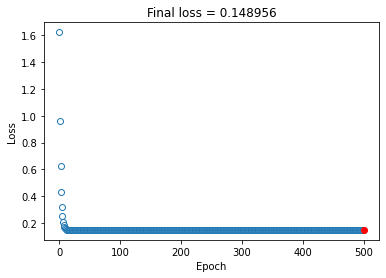

In [ ]:

# show the losses

# manually compute losses
# final forward pass
predictions = ANNreg(x)

# final loss (MSE)
testloss = (predictions-y).pow(2).mean()

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(numepochs,testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()

In [ ]:
testloss.item()

0.14895649254322052

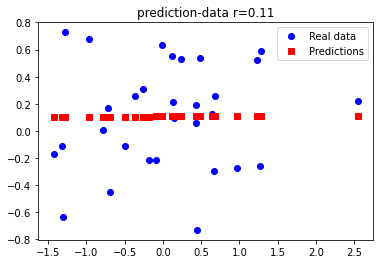

In [ ]:
# plot the data
plt.plot(x,y,'bo',label='Real data')
plt.plot(x,predictions.detach(),'rs',label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()

# Additional explorations

In [ ]:
# 1) How much data is "enough"? Try different values of N and see how low the loss gets. 
#    Do you still get low loss ("low" is subjective, but let's say loss<.25) with N=10? N=5?
# 
# 2) Does your conclusion above depend on the amount of noise in the data? Try changing the noise level
#    by changing the division ("/2") when creating y as x+randn.
# 
# 3) Notice that the model doesn't always work well. Put the original code (that is, N=30 and /2 noise)
#    into a function or a for-loop and repeat the training 100 times (each time using a fresh model instance).
#    Then count the number of times the model had a loss>.25.

#ANN for Classification

In [3]:
# import dataset (comes with seaborn)
import seaborn as sns
iris = sns.load_dataset('iris')

# check out the first few lines of data
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


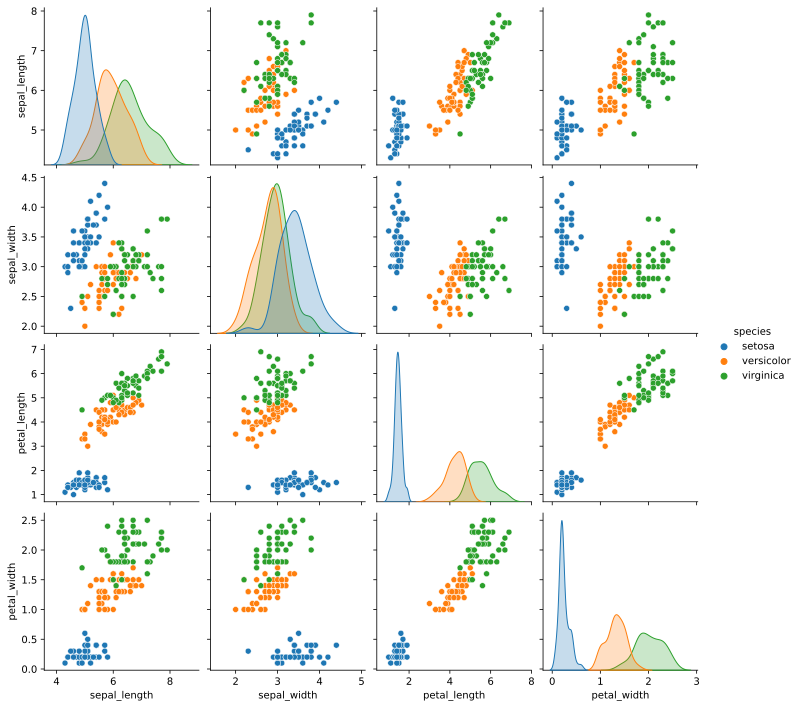

In [ ]:
# some plots to show the data
sns.pairplot(iris, hue='species')
plt.show()

In [4]:
# organize the data

# convert from pandas dataframe to tensor
data = torch.tensor( iris[iris.columns[0:4]].values ).float()

# transform species to number
labels = torch.zeros(len(data), dtype=torch.long)
# labels[iris.species=='setosa'] = 0 # don't need!
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [63]:
# model architecture
ANNiris = nn.Sequential(
    nn.Linear(4,64),   # input layer
    nn.ReLU(),         # activation
    nn.Linear(64,64),  # hidden layer
    nn.ReLU(),         # activation
    nn.Linear(64,3),   # output layer
    nn.Softmax(dim=1)
      )

# loss function
# lossfun = nn.CrossEntropyLoss()
lossfun = nn.NLLLoss()


# optimizer
optimizer = torch.optim.SGD(ANNiris.parameters(),lr=.01)

In [64]:

numepochs = 1000

# initialize losses
losses = torch.zeros(numepochs)
ongoingAcc = []

# loop over epochs
for epochi in range(numepochs):

  # forward pass
  yHat = ANNiris(data)

  # compute loss
  loss = lossfun(yHat,labels)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # compute accuracy
  matches = torch.argmax(yHat,axis=1) == labels # booleans (false/true)
  matchesNumeric = matches.float()              # convert to numbers (0/1)
  accuracyPct = 100*torch.mean(matchesNumeric)  # average and x100 
  ongoingAcc.append( accuracyPct )              # add to list of accuracies



# final forward pass
predictions = ANNiris(data)
  
predlabels = torch.argmax(predictions,axis=1)
totalacc = 100*torch.mean((predlabels == labels).float())

In [72]:
# confirm that all model predictions sum to 1, but only when converted to softmax
yHat
# sum(yHat[0])
# torch.sum(yHat,axis=1)


tensor([[9.8880e-01, 1.1193e-02, 8.9778e-06],
        [9.7494e-01, 2.5021e-02, 3.9345e-05],
        [9.8359e-01, 1.6387e-02, 2.2602e-05],
        [9.7265e-01, 2.7291e-02, 5.6501e-05],
        [9.8990e-01, 1.0093e-02, 8.0885e-06],
        [9.9001e-01, 9.9876e-03, 6.2679e-06],
        [9.8466e-01, 1.5315e-02, 2.2118e-05],
        [9.8457e-01, 1.5414e-02, 1.6349e-05],
        [9.6708e-01, 3.2826e-02, 8.9286e-05],
        [9.7567e-01, 2.4293e-02, 3.6682e-05],
        [9.9099e-01, 9.0082e-03, 5.0365e-06],
        [9.8080e-01, 1.9170e-02, 2.6913e-05],
        [9.7559e-01, 2.4373e-02, 3.9686e-05],
        [9.8208e-01, 1.7884e-02, 3.3828e-05],
        [9.9645e-01, 3.5470e-03, 8.0505e-07],
        [9.9654e-01, 3.4618e-03, 8.6492e-07],
        [9.9457e-01, 5.4229e-03, 2.3004e-06],
        [9.8854e-01, 1.1449e-02, 9.5910e-06],
        [9.8960e-01, 1.0392e-02, 5.2494e-06],
        [9.9115e-01, 8.8484e-03, 6.1910e-06],
        [9.7928e-01, 2.0697e-02, 1.9967e-05],
        [9.8957e-01, 1.0420e-02, 8

In [73]:
torch.argmax(yHat,axis=1)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

Final accuracy: 98%


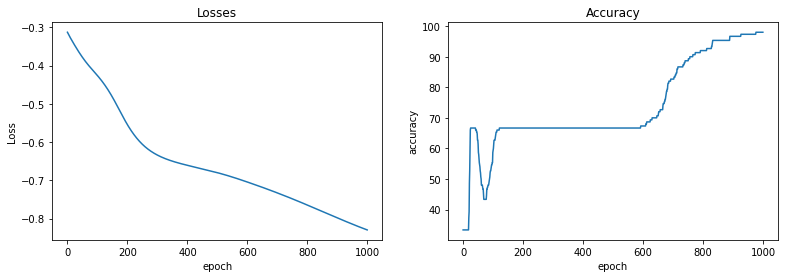

In [70]:
# report accuracy
print('Final accuracy: %g%%' %totalacc)

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()
# run training again to see whether this performance is consistent

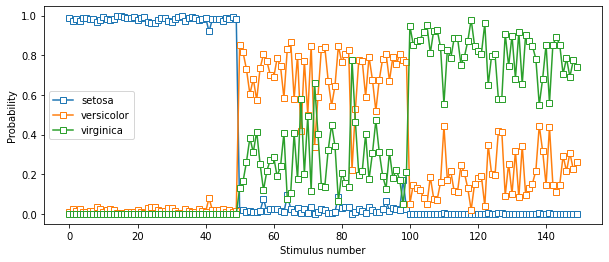

In [76]:
# plot the raw model outputs

fig = plt.figure(figsize=(10,4))

plt.plot(yHat.detach(),'s-',markerfacecolor='w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['setosa','versicolor','virginica'])
plt.show()

# try it again without the softmax!

#Additional Explorartion

In [77]:
# 1) When the loss does not reach an asymptote, it's a good idea to train the model for more epochs. Increase the number of
#    epochs until the plot of the losses seems to hit a "floor" (that's a statistical term for being as small as possible).
# 
# 2) We used a model with 64 hidden units. Modify the code to have 16 hidden units. How does this model perform? If there
#    is a decrease in accuracy, is that decrease distributed across all three iris types, or does the model learn some
#    iris types and not others?
# 
# 3) Write code to compute three accuracy scores, one for each iris type. In real DL projects, category-specific accuracies
#    are often more informative than the aggregated accuracy.
# 